# Example LOOCV Results

In this notebook we will run the example script: **example_loocv_script.py**, which will, similar to the tutorial notebook, run the GTM-decon engine in a leave-one-out manner on the example paired single cell and bulk data. For more details, you can see the either the tutorial notebook or the **example_loocv_script.py** source code itself.

In [6]:
!python example_loocv_script.py

/home/mcb/users/zhuang35/projects/gtm-decon/PythonWrapper/GTM_decon.py:583: UserWarning: Duplicate genes found in bulk data indices! Dropping duplicates, keeping first!
  warnings.warn('Duplicate genes found in bulk data indices! Dropping duplicates, keeping first!')
/home/mcb/users/zhuang35/projects/gtm-decon/PythonWrapper/GTM_decon.py:583: UserWarning: Duplicate genes found in bulk data indices! Dropping duplicates, keeping first!
  warnings.warn('Duplicate genes found in bulk data indices! Dropping duplicates, keeping first!')
/home/mcb/users/zhuang35/projects/gtm-decon/PythonWrapper/GTM_decon.py:583: UserWarning: Duplicate genes found in bulk data indices! Dropping duplicates, keeping first!
  warnings.warn('Duplicate genes found in bulk data indices! Dropping duplicates, keeping first!')
/home/mcb/users/zhuang35/projects/gtm-decon/PythonWrapper/GTM_decon.py:583: UserWarning: Duplicate genes found in bulk data indices! Dropping duplicates, keeping first!
  warnings.warn('Duplicate 

### Loading Data and Imports

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from scipy.stats import pearsonr, spearmanr, linregress

In [22]:
batches = ['D1', 'D2', 'D3', 'D4', 'H1', 'H2', 'H3']

Gather GTM-decon inferred cell-type proportions for each LOOCV batch. 

In [23]:
l = []

for batch in batches:
    results_path = os.path.join('tutorial_results', batch, 'gatheredResults.csv')
    
    l.append(pd.read_csv(results_path, index_col=0))
    
GTM_proportions = pd.concat(l)

In [24]:
GTM_proportions

,MHC class II cell,PSC cell,acinar cell,alpha cell,beta cell,co-expression cell,delta cell,ductal cell,endothelial cell,epsilon cell,gamma cell,mast cell,unclassified cell,unclassified endocrine cell
D1,0.008468,0.053854,0.030319,0.222971,0.333705,0.042146,0.066776,0.066735,0.007687,0.010810,0.134232,0.006097,0.009155,0.007044
D2,0.010687,0.091598,0.077006,0.172403,0.205807,0.028771,0.053742,0.225253,0.009619,0.010886,0.087181,0.008506,0.009748,0.008791
D3,0.010725,0.102615,0.044842,0.227616,0.167013,0.033015,0.041002,0.263454,0.006580,0.012171,0.064226,0.008384,0.009822,0.008534
D4,0.008584,0.130468,0.041767,0.134154,0.310263,0.030890,0.036306,0.193062,0.009416,0.009841,0.072489,0.007230,0.008212,0.007318
H1,0.013059,0.054032,0.027503,0.214451,0.374821,0.035238,0.058080,0.053262,0.023503,0.013182,0.102567,0.009932,0.011338,0.009031
H2,0.006028,0.007733,0.161001,0.113166,0.396123,0.034720,0.052384,0.127183,0.003017,0.009086,0.070565,0.005549,0.007001,0.006442
H3,0.016674,0.080935,0.021440,0.260306,0.341225,0.040380,0.050824,0.051870,0.008338,0.012308,0.087429,0.008780,0.011326,0.008166


### Load Proportions File

We use the single-cell proportions for each sample as a proxy for the ground-truth cell-type proportions.

In [27]:
proportions = pd.read_csv("../data/example_proportions.csv", index_col=0)

In [31]:
proportions

,MHC class II cell,PSC cell,acinar cell,alpha cell,beta cell,co-expression cell,delta cell,ductal cell,endothelial cell,epsilon cell,gamma cell,mast cell,unclassified cell,unclassified endocrine cell
D1,0.000000,0.008000,0.032000,0.564000,0.040000,0.004000,0.036000,0.012000,0.004000,0.004000,0.280000,0.000000,0.004000,0.012000
D2,0.007246,0.043478,0.101449,0.431159,0.050725,0.018116,0.021739,0.275362,0.003623,0.000000,0.028986,0.007246,0.000000,0.010870
D3,0.003521,0.045775,0.084507,0.306338,0.038732,0.003521,0.017606,0.440141,0.003521,0.000000,0.035211,0.000000,0.000000,0.021127
D4,0.003311,0.013245,0.043046,0.317881,0.211921,0.019868,0.115894,0.155629,0.000000,0.003311,0.112583,0.003311,0.000000,0.000000
H1,0.000000,0.045455,0.013636,0.418182,0.159091,0.027273,0.054545,0.063636,0.036364,0.013636,0.140909,0.000000,0.004545,0.022727
H2,0.000000,0.008547,0.341880,0.111111,0.136752,0.021368,0.008547,0.286325,0.000000,0.004274,0.064103,0.000000,0.000000,0.017094
H3,0.000000,0.029557,0.014778,0.669951,0.167488,0.029557,0.034483,0.039409,0.004926,0.000000,0.009852,0.000000,0.000000,0.000000


## Computing Spearman R
We can compute the Spearman Correlation Coefficient for our inferred cell-type proportions and the real single-cell proportions of the left out batches (as a proxy for the ground truth cell-type proportions.

In [32]:
spearman_results = []
for b in proportions.index:
    spearman_results.append(spearmanr(
        GTM_proportions.loc[b][proportions.columns],
        proportions.loc[b],
    )[0])

Text(0, 0.5, 'Spearman R')

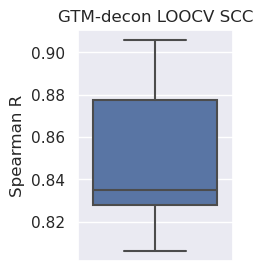

In [87]:
sns.set(rc={'figure.figsize': (2, 3), 'figure.dpi': 100})
sns.boxplot(spearman_results)
plt.title('GTM-decon LOOCV SCC')
# plt.xlabel('')
plt.xticks([])
plt.ylabel('Spearman R')


## Plotting Cell-type specific $R^2$

In order to evaluate possible biases, we can see how our model performs on the basis of each celltype. Here we will show these results for the 6 most common cell-types in the example data. Similar to Figure 2b.

In [83]:
cell_types_to_plot = sorted(['alpha cell', 'ductal cell', 'beta cell', 'gamma cell', 'acinar cell', 'delta cell'])

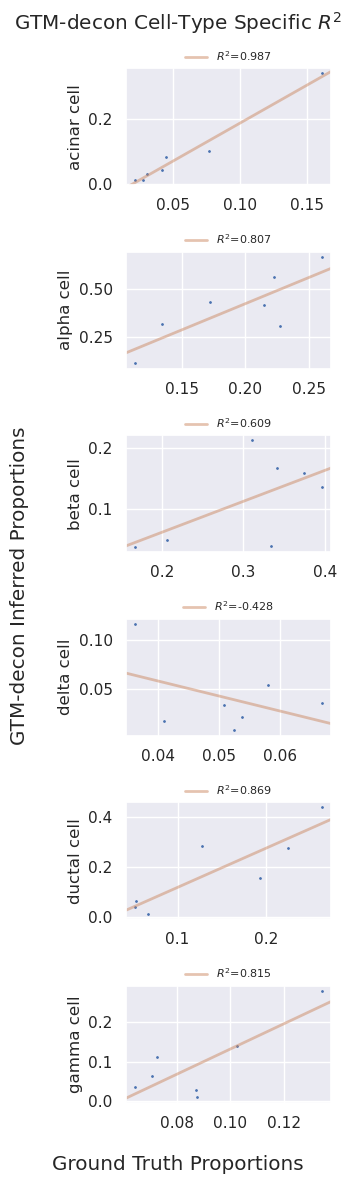

In [85]:
sns.set(rc={'figure.figsize': (3.5, 12),'figure.dpi': 100})
fig, axes = plt.subplots(6, 1)
plt.subplots_adjust(hspace=0.6, wspace=0.6)

for index, celltype in enumerate(cell_types_to_plot):
    k, n, r, _, _ = linregress(
        GTM_proportions[celltype],
        proportions[celltype],
    )
    sns.scatterplot(
        x = GTM_proportions[celltype],
        y = proportions[celltype],
        ax = axes[index],
        s=5,
    )

    ymin, ymax = axes[index].get_ylim()
    xmin, xmax = axes[index].get_xlim()
    axes[index].axline((0, n), slope=k, label=f'$R^2$={r:.3f}', color="#cc8963", lw=2, alpha=0.5)
    axes[index].legend(framealpha=0, fontsize=8, loc='upper center', 
                    bbox_to_anchor = [0.5, 1.25])

    axes[index].set_ylim(ymin, ymax)
    axes[index].set_xlim(xmin, xmax)
    axes[index].set_ylabel(celltype)
    axes[index].set_xlabel('')
    
fig.supylabel('GTM-decon Inferred Proportions')
fig.supxlabel('Ground Truth Proportions')
fig.suptitle('GTM-decon Cell-Type Specific $R^2$')

plt.tight_layout()